In [155]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [156]:
# load dataset
df = pd.read_csv('./insurance.csv')

In [157]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [158]:
# apply
# map function
# onehot coding
# pd.getdummies 

In [159]:
#df.smoker = df.smoker.apply(lambda smoker: 1 if 'yes' else 0)
df['smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

In [160]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [161]:
df['sex'] = np.where(df['sex'] == 'male', 1, 0)

In [162]:
df['region'].replace({'southwest':1, 'southeast':2,'northwest':1, 'northeast':2}, inplace=True)

In [163]:
# df_train=df.sample(frac=0.8,random_state=200)
# df_test=df.drop(train.index)

In [164]:
#df.drop(['region'], axis=1)

In [165]:
# understand the dependent variable 'charges'
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

C:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

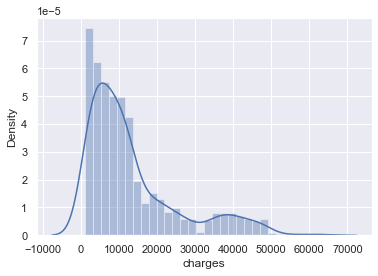

In [166]:
# plot using histogram
sns.distplot(df['charges'])


In [167]:
#skewness and kurtosis
print("Skewness: %f" % df['charges'].skew())
print("Kurtosis: %f" % df['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


C:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

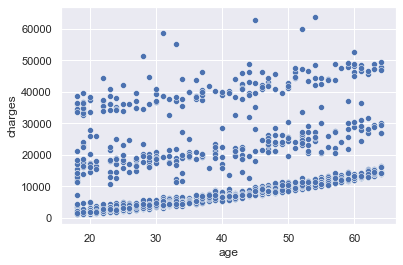

In [168]:
sns.scatterplot(df['age'],df['charges'])

C:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='charges'>

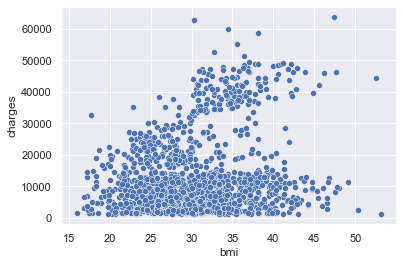

In [169]:
sns.scatterplot(df['bmi'],df['charges'])

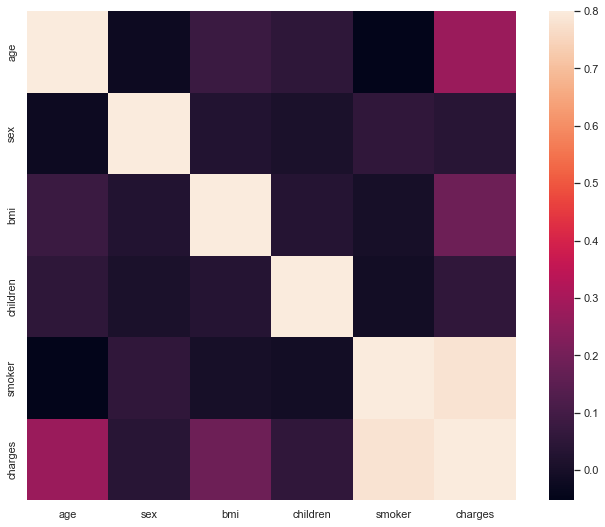

In [170]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [171]:
# # correlation matrix
# k = 10   # number of variables for heatmapp
# cols = corrmat.nlargest(k,'charges')['score'].index
# cm = np.corrcoef(df_train[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
# plt.show()

C:\Programs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


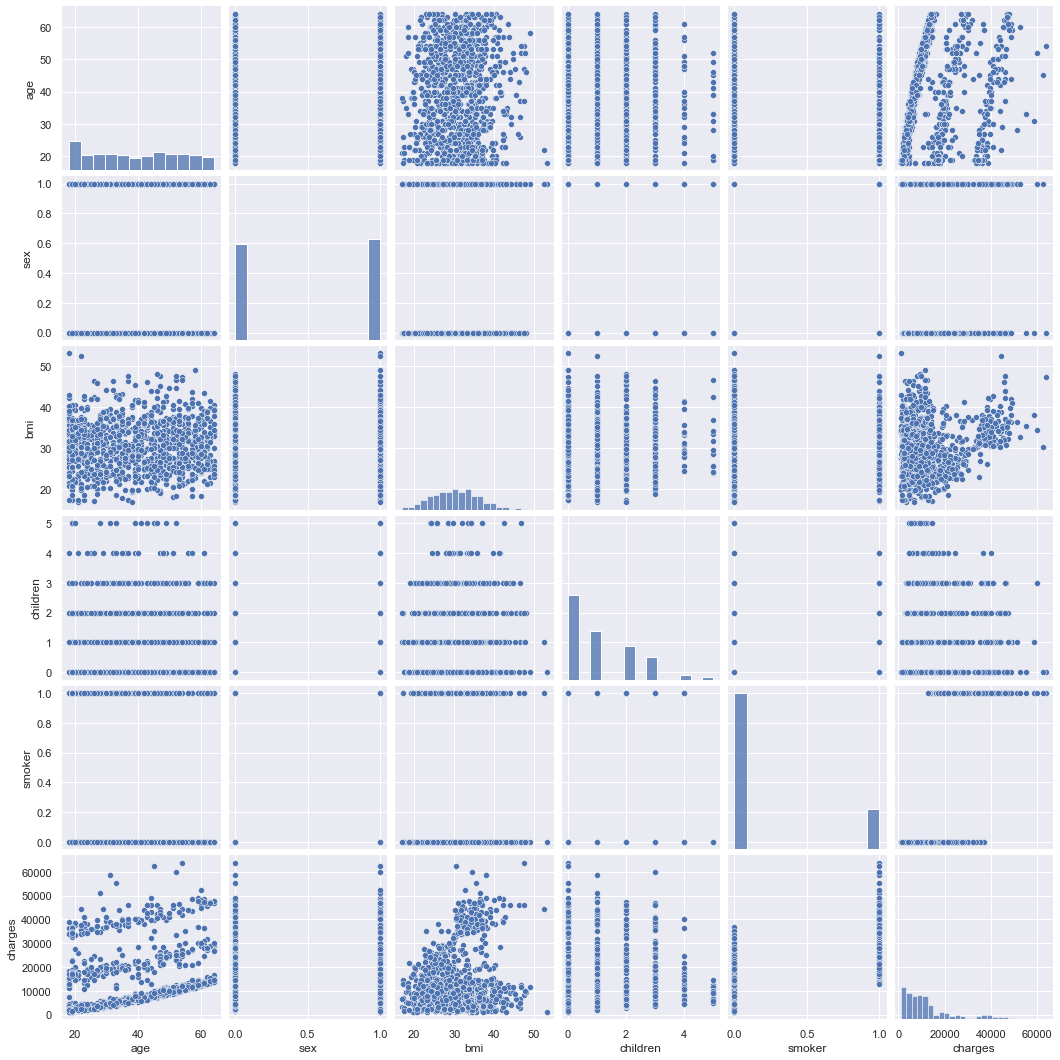

In [172]:
sns.set()

sns.pairplot(df_train,size=2.5)
plt.show()

In [153]:
#df.drop(['region'], axis=1)

In [173]:
y = df.pop('charges')
X = df
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
332,61,0,31.160,0,0,1
355,46,1,27.600,0,0,1
138,54,0,31.900,3,0,2
381,55,1,30.685,0,1,2
292,25,1,45.540,2,1,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,2
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,2
860,37,0,47.600,2,1,1


In [174]:
X_train

,age,sex,bmi,children,smoker,region
332,61,0,31.160,0,0,1
355,46,1,27.600,0,0,1
138,54,0,31.900,3,0,2
381,55,1,30.685,0,1,2
292,25,1,45.540,2,1,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,2
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,2
860,37,0,47.600,2,1,1


In [175]:
y_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

In [176]:
X_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,2
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1
...,...,...,...,...,...,...
701,50,0,44.745,0,0,2
672,36,1,29.700,0,0,2
1163,18,0,28.215,0,0,2
1103,58,1,36.080,0,0,2


In [177]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [179]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [180]:
r2_score(y_test, y_pred)

0.7678922465241698